In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [33]:
## 데이터 준비
df = pd.DataFrame({
'Stock': ['Barbarian','Amazon','Necromancer','Sorceress','Paladin'],
'Strength': [10, 5, 3, 2, 7],
'Dexterity': [4, 10, 3, 3, 8],
'Vitality': [9, 9, 7, 7, 8],
'Energy': [4, 4, 10, 10, 6],
'Wisdom': [2, 6, 8, 9, 8]
})

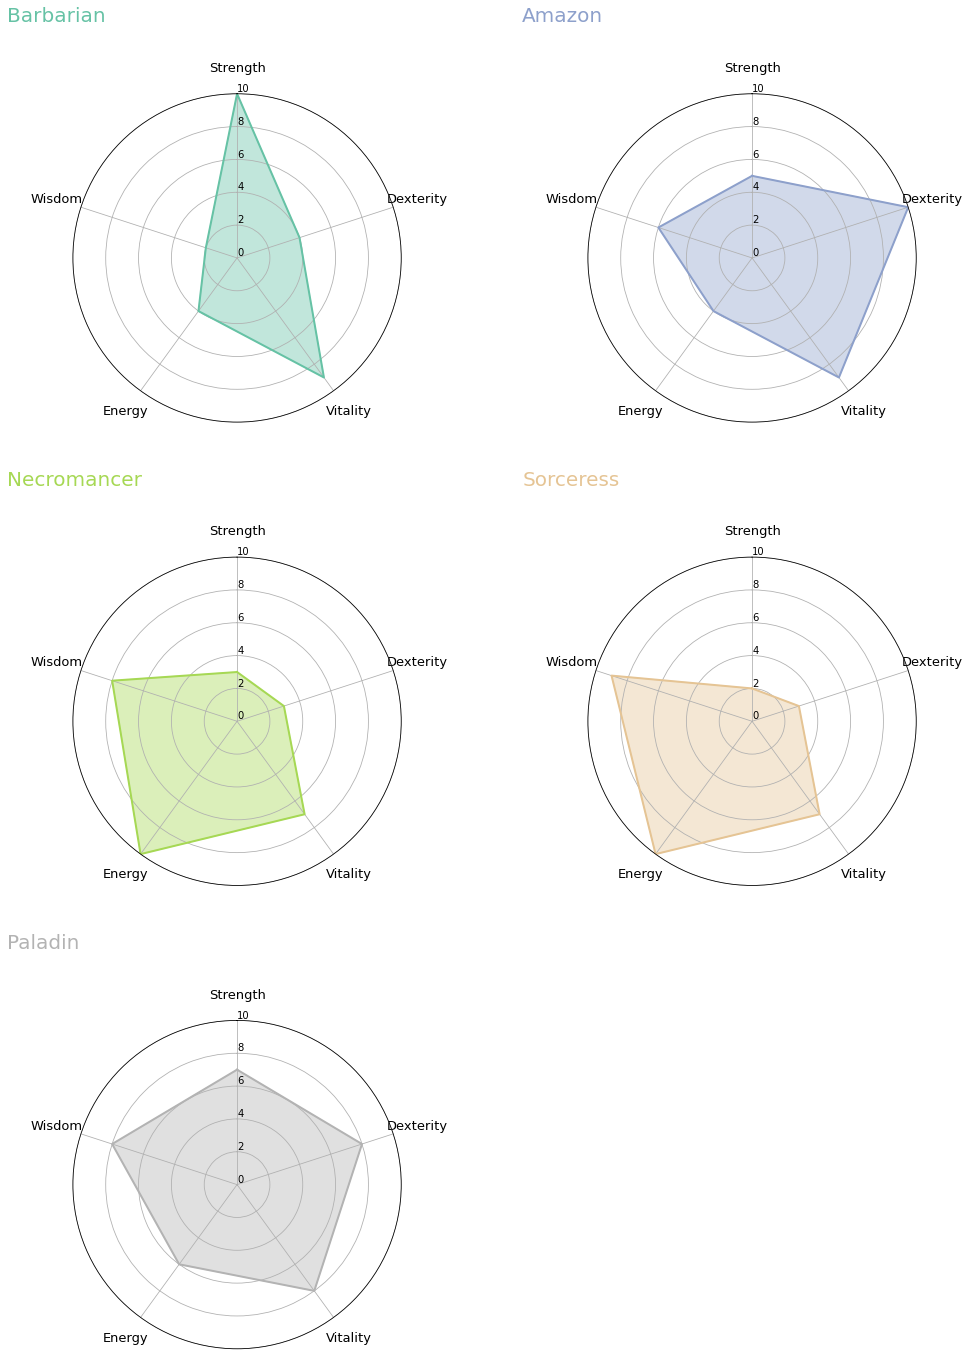

In [35]:
labels = df.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(df.index))

fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('Stock').tolist()
    data += data[:1]

    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi/2) # 시작점 설정
    ax.set_theta_direction(-1) # 시계방향으로 그리기

    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)

    ax.set_rlabel_position(0)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Stock, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()